In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud, STOPWORDS
import kagglehub
import os
import zipfile
import shutil
import plotly.express as px
import webbrowser

### UFO DATASET download (출처: Kaggle - UFO sightings National UFO Reporting Center (NUFORC))

In [ ]:
# 저장할 경로
save_path = '/home/yj/dev_ws/project_UFO/data'    #  /home/yj/dev_ws/project_UFO/data -> 자신의 환경에 맞게 수정
os.makedirs(save_path, exist_ok=True)

# dataset 다운로드 (최신 버전)
downloaded = kagglehub.dataset_download("NUFORC/ufo-sightings", force_download=True)

# 다운로드 결과 확인
if os.path.isdir(downloaded):
    # 이미 폴더라면, 안에 있는 파일을 save_path로 복사
    for file in os.listdir(downloaded):
        shutil.copy(os.path.join(downloaded, file), save_path)
    print(f"Dataset folder copied to: {save_path}")
else:
    # zip 파일이면 이동 후 압축 해제
    shutil.move(downloaded, os.path.join(save_path, 'ufo-sightings.zip'))
    with zipfile.ZipFile(os.path.join(save_path, 'ufo-sightings.zip'), 'r') as zip_ref:
        zip_ref.extractall(save_path)
    print(f"Dataset downloaded and extracted to: {save_path}")

### UFO DATASTE read (scrubbed.csv 사용)

In [3]:
raw_data = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv')
raw_data.info()

UFO = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv', header=0, low_memory=False)
UFO.head(30)

/tmp/ipykernel_7888/911177013.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


### columns 확인

In [4]:
UFO.head()
UFO.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

### 연도별 / 5년 단위 data 확인

/tmp/ipykernel_7888/1263807144.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values,


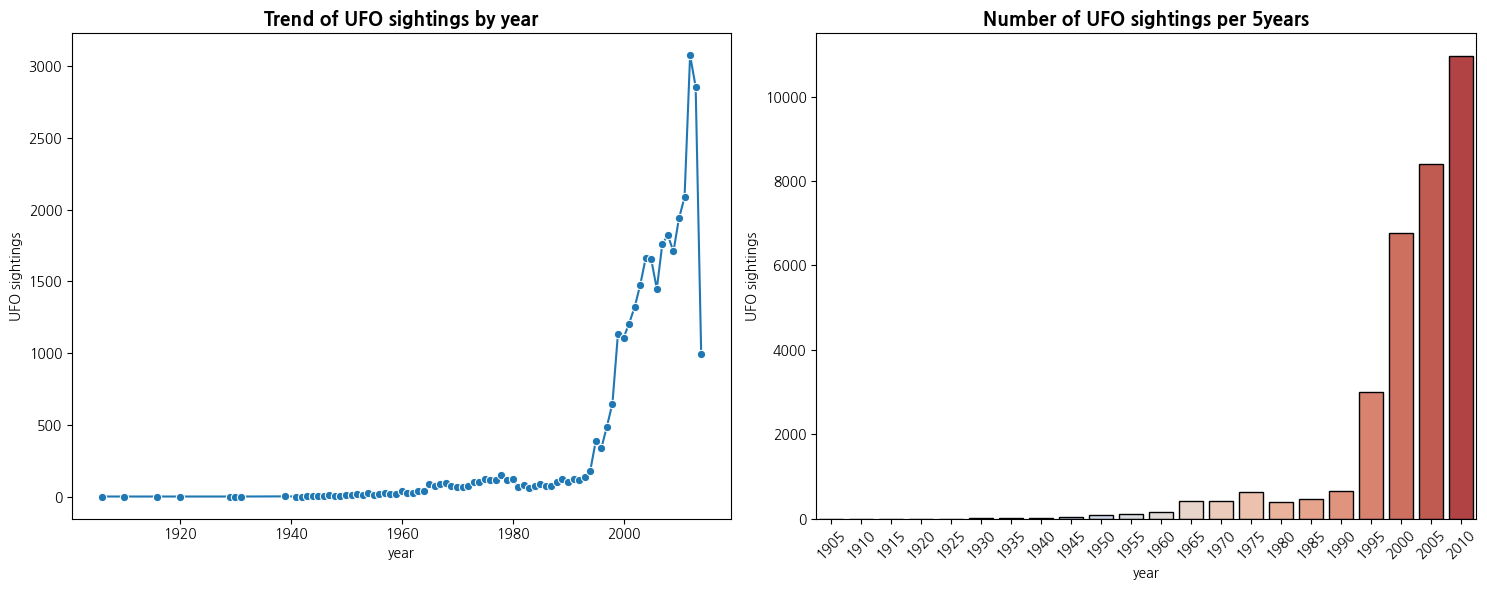

In [6]:
# datetime 컬럼을 날짜형으로 변환
UFO['datetime'] = pd.to_datetime(UFO['datetime'], errors='coerce', dayfirst=True)
UFO['year'] = UFO['datetime'].dt.year

# 유효한 연도만 필터링 (1900~2025)
UFO = UFO[(UFO['year'] >= 1900) & (UFO['year'] <= 2025)]

# 연도별 / 5년 단위 집계
yearly_counts = UFO['year'].value_counts().sort_index()
UFO['decade'] = (UFO['year'] // 5) * 5
decade_counts = UFO['decade'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(15, 6))

# 연도별 그래프
plt.subplot(1, 2, 1)
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values,
             marker='o', color='#1f77b4')
plt.title('Trend of UFO sightings by year', fontsize=14, fontweight='bold')
plt.xlabel('year')
plt.ylabel('UFO sightings')

# 5년 단위 그래프
plt.subplot(1, 2, 2)
sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values,
            palette='coolwarm', edgecolor='black')
plt.title('Number of UFO sightings per 5years', fontsize=14, fontweight='bold')
plt.xlabel('year')
plt.ylabel('UFO sightings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 1995년 data 부터 사용하기로 결정

### 월별 data 확인 (1) 1995~2014, (2) 1995~2000, (3) 2001~2010

/tmp/ipykernel_7888/2291303233.py:4: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


/tmp/ipykernel_7888/2291303233.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UFO_9514['year_month'] = UFO_9514['datetime'].dt.to_period('M')


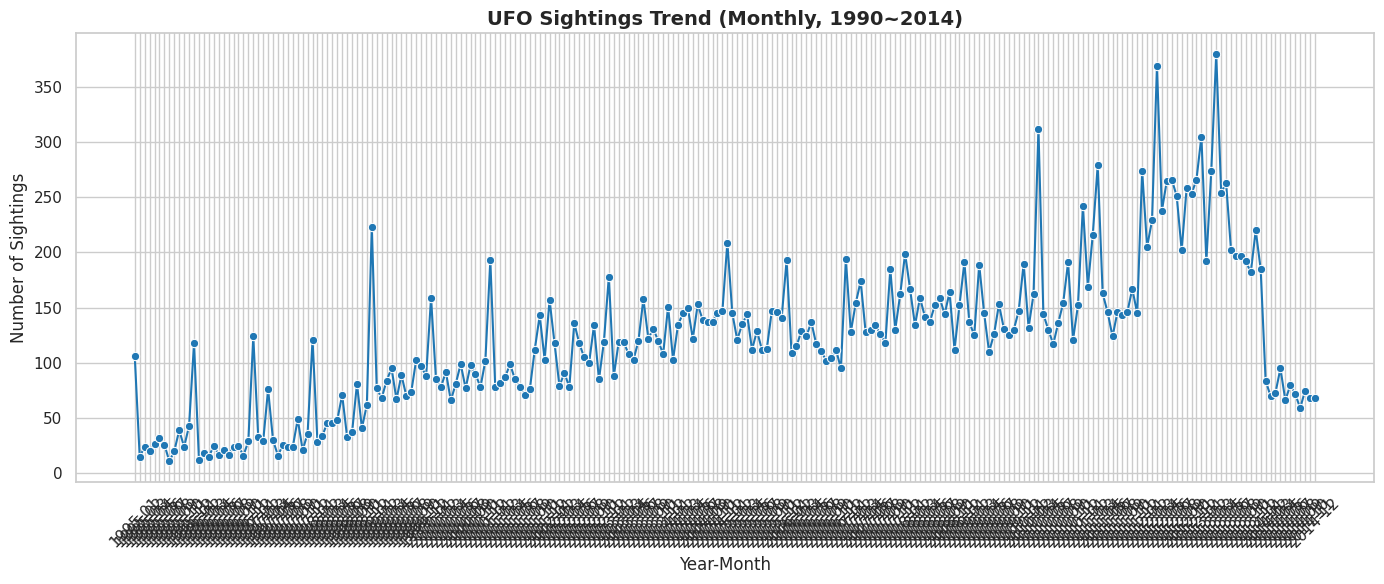

/tmp/ipykernel_7888/2291303233.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UFO_9599['year_month'] = UFO_9599['datetime'].dt.to_period('M')


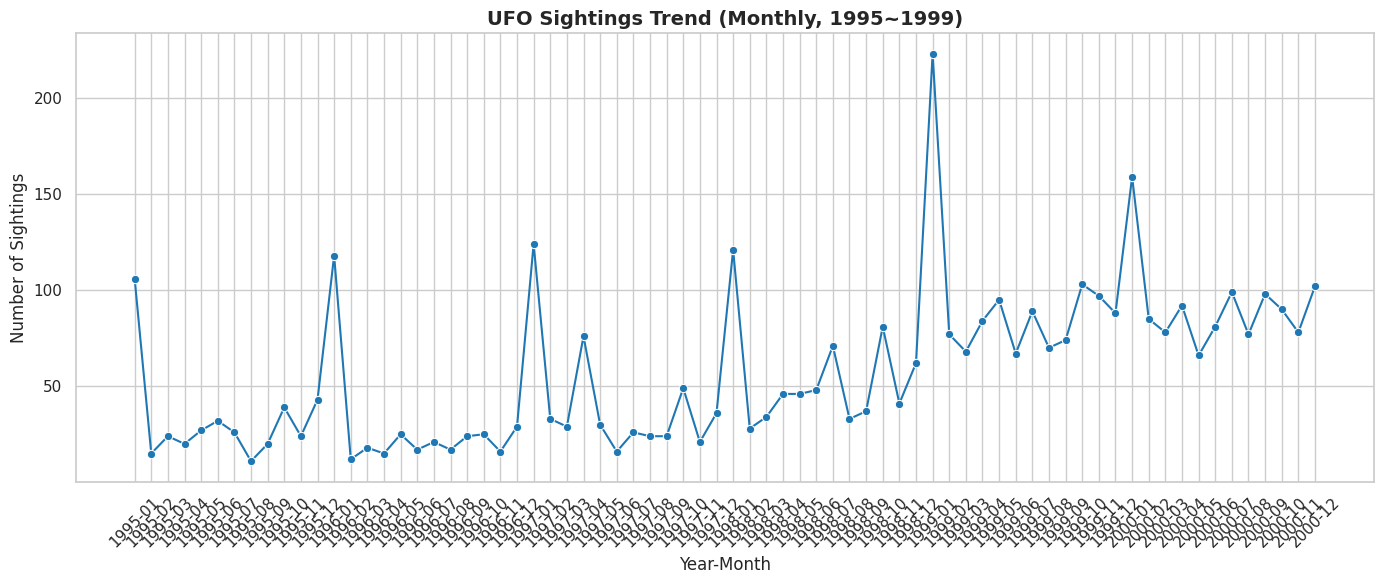

/tmp/ipykernel_7888/2291303233.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UFO_0014['year_month'] = UFO_0014['datetime'].dt.to_period('M')


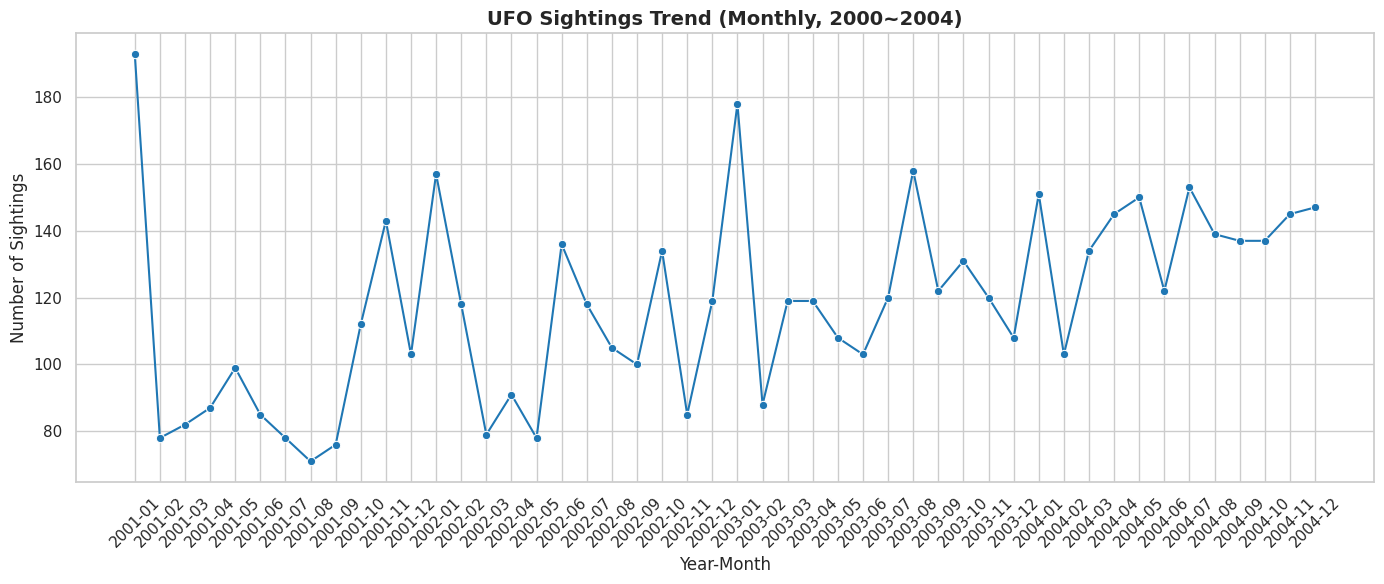

/tmp/ipykernel_7888/2291303233.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UFO_0509['year_month'] = UFO_0509['datetime'].dt.to_period('M')


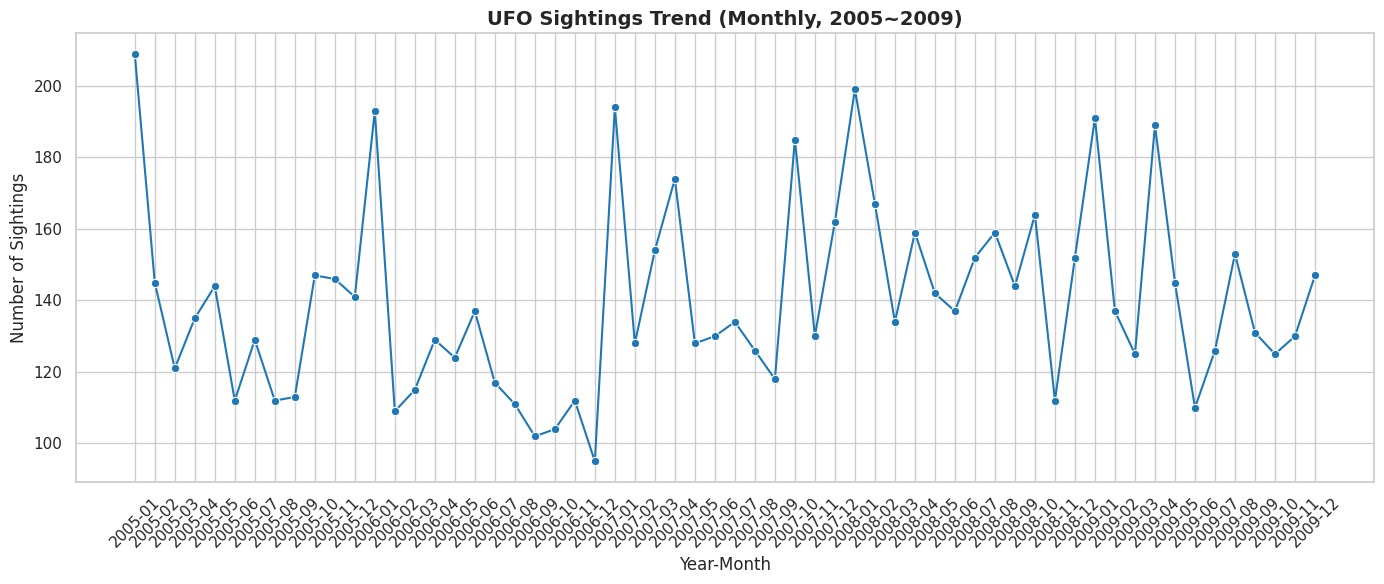

In [17]:
# Seaborn 스타일
sns.set(style='whitegrid', palette='coolwarm')

raw_data = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv')
raw_data.info()

UFO = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv', header=0, low_memory=False)

# datetime 컬럼을 날짜형으로 변환
UFO['datetime'] = pd.to_datetime(UFO['datetime'], errors='coerce', dayfirst=True)

# 1995~2014 사이 데이터만 필터링
UFO_9514 = UFO[(UFO['datetime'].dt.year >= 1995) & (UFO['datetime'].dt.year <= 2014)]

# 연-월 단위 컬럼 생성
UFO_9514['year_month'] = UFO_9514['datetime'].dt.to_period('M')

# 월별 UFO 목격 건수 집계
monthly_counts = UFO_9514['year_month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2014)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 1995~1999 사이 데이터만 필터링
UFO_9599 = UFO[(UFO['datetime'].dt.year >= 1995) & (UFO['datetime'].dt.year <= 2000)]

# 연-월 단위 컬럼 생성
UFO_9599['year_month'] = UFO_9599['datetime'].dt.to_period('M')

# 월별 UFO 목격 건수 집계
monthly_counts = UFO_9599['year_month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1995~1999)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2000~2004 사이 데이터만 필터링
UFO_0014 = UFO[(UFO['datetime'].dt.year >= 2001) & (UFO['datetime'].dt.year <= 2004)]

# 연-월 단위 컬럼 생성
UFO_0014['year_month'] = UFO_0014['datetime'].dt.to_period('M')

# 월별 UFO 목격 건수 집계
monthly_counts = UFO_0014['year_month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 2000~2004)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2005~2009 사이 데이터만 필터링
UFO_0509 = UFO[(UFO['datetime'].dt.year >= 2005) & (UFO['datetime'].dt.year <= 2009)]

# 연-월 단위 컬럼 생성
UFO_0509['year_month'] = UFO_0509['datetime'].dt.to_period('M')

# 월별 UFO 목격 건수 집계
monthly_counts = UFO_0509['year_month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 2005~2009)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 요일별 data 확인

/tmp/ipykernel_7888/744413942.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/yj/dev_ws/project_UFO/data/scrubbed.csv")  # 데이터 파일 경로
/tmp/ipykernel_7888/744413942.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_weekday, x='weekday', y='count', order=weekday_order, palette="YlGnBu")


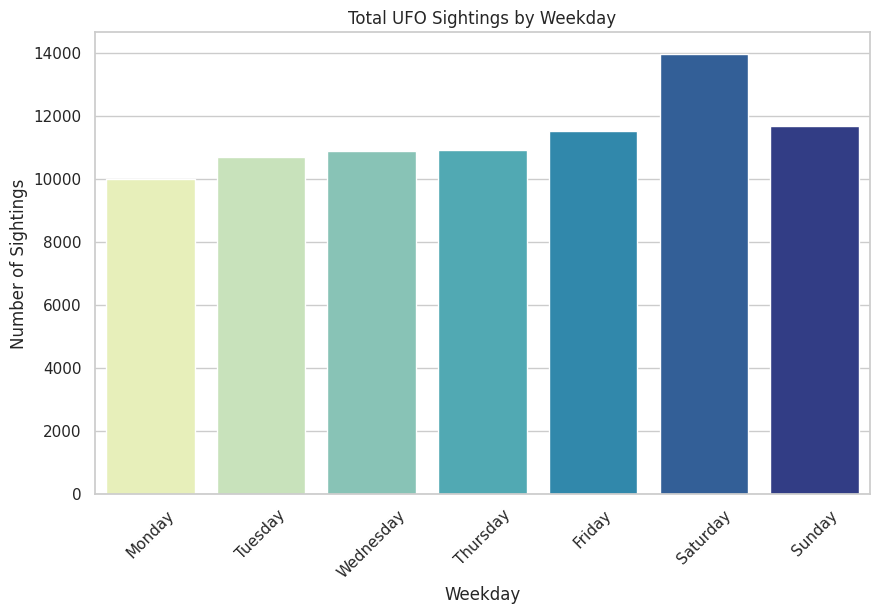

In [18]:
df = pd.read_csv("/home/yj/dev_ws/project_UFO/data/scrubbed.csv")  # 데이터 파일 경로
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['date_posted'] = pd.to_datetime(df['date posted'], errors='coerce')

# 필요한 컬럼 정리
df = df[['datetime','city','state','country','shape','duration (seconds)',
         'comments','latitude','longitude ']].copy()
df.rename(columns={'longitude ':'longitude'}, inplace=True)

# 시간 관련 feature 추가

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.day_name()

# 요일별 UFO 목격 수 합계
df_weekday = df.groupby('weekday').size().reset_index(name='count')

# 요일 순서 지정 (Mon~Sun)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,6))
sns.barplot(data=df_weekday, x='weekday', y='count', order=weekday_order, palette="YlGnBu")
plt.title("Total UFO Sightings by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Sightings")
plt.xticks(rotation=45)
plt.show()


### 국가별 data 확인

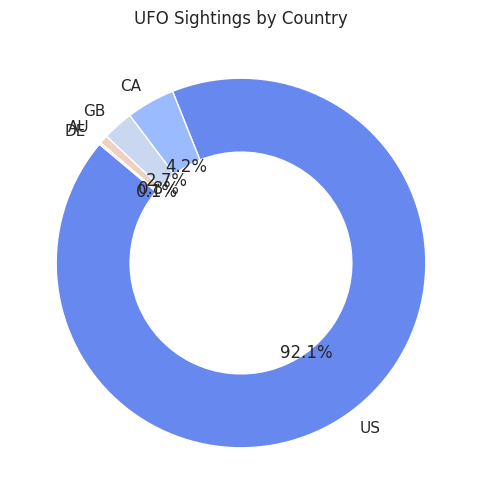

In [21]:
# country 데이터
country_data = {
    "country": ["US", "CA", "GB", "AU", "DE"],
    "count": [65114, 3000, 1905, 538, 105]
}
df_country = pd.DataFrame(country_data)
country_iso3 = {"US": "USA", "CA": "CAN", "GB": "GBR", "AU": "AUS", "DE": "DEU"}
df_country["iso_code"] = df_country["country"].map(country_iso3)

plt.figure(figsize=(6,6))
plt.pie(df_country["count"], labels=df_country["country"], autopct="%1.1f%%", startangle=140, wedgeprops=dict(width=0.4))
plt.title("UFO Sightings by Country")
plt.show()

### 일단 US data만 사용하기로 결정

### 주 별 data 확인

/tmp/ipykernel_7888/4048729631.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




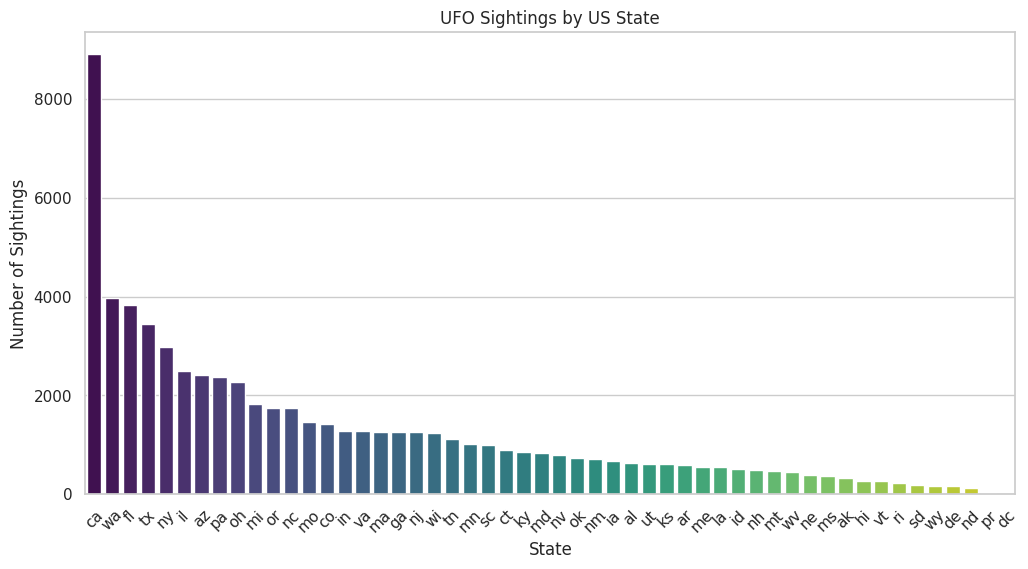

In [24]:
# 미국 데이터만 필터링

df_us = df[df['country']=='us'].copy()

#  주별 sighting 횟수 계산

state_counts = df_us['state'].value_counts().reset_index()
state_counts.columns = ['state','count']

#  시각화 (Barplot)

plt.figure(figsize=(12,6))
sns.barplot(data=state_counts, x='state', y='count', palette="viridis")
plt.xticks(rotation=45)
plt.title("UFO Sightings by US State")
plt.ylabel("Number of Sightings")
plt.xlabel("State")
plt.show()

In [30]:
import plotly.graph_objects as go

try:
    df = pd.read_csv("/home/yj/dev_ws/project_UFO/data/scrubbed.csv", low_memory=False)
except FileNotFoundError:
    print("Error: 파일을 찾을 수 없습니다. 경로를 확인해주세요. 임시 데이터로 진행합니다.")
    # 파일이 없을 경우를 대비해 예시 데이터셋 생성 (실제 데이터셋 구조와 유사하게)
    states = ['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI'] * 5 + ['WA']
    shapes = ['Circle', 'Light', 'Disk', 'Cylinder', 'Fireball', 'Triangle', 'Unknown']
    np.random.seed(42)
    data = {
        'datetime': pd.to_datetime(['2020-01-01'] * len(states)),
        'city': ['City'] * len(states),
        'state': states,
        'country': ['us'] * len(states),
        'shape': np.random.choice(shapes, size=len(states), p=[0.2, 0.3, 0.15, 0.1, 0.1, 0.1, 0.05]),
        'duration (seconds)': np.random.randint(10, 3600, size=len(states)),
        'comments': ['Comment'] * len(states),
        'latitude': np.random.uniform(25, 49, size=len(states)),
        'longitude ': np.random.uniform(-125, -67, size=len(states)),
    }
    df = pd.DataFrame(data)

# 필요한 컬럼 정리 및 이름 변경
df.rename(columns={'longitude ':'longitude'}, inplace=True)

# 데이터 클리닝 및 필터링
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# 미국(US) 데이터만 사용하고, 'state'가 결측치인 행 제거
df_us = df[df['country'] == 'us'].dropna(subset=['state']).copy()

# 요청: 가장 많은 형태인 'light'를 제외
df_filtered = df_us[df_us['shape'].str.lower() != 'light'].copy()

# 'state' 코드가 대문자이도록 통일
df_filtered['state'] = df_filtered['state'].str.upper()

# 주(state)별 전체 목격 건수 집계 (Shape 상관 없음)
df_plot = df_filtered.groupby('state').size().reset_index(name='total_sightings')

# Plotly Express를 사용하여 기본 지오 버블 맵 생성
fig = px.scatter_geo(
    df_plot,
    locations="state",                   # 주 코드를 위치로 사용
    locationmode='USA-states',           # 미국 주 모드로 설정
    color= "total_sightings",            # 목격 횟수를 색상으로 구분 (강조)
    size="total_sightings",              # 목격 건수에 따라 원의 크기 결정
    hover_name="state",                  # 마우스 오버 시 표시될 이름
    hover_data={
        'total_sightings': True,         # 목격 건수 표시
        'state': False                   # state 중복 표시 방지
    },
    scope="usa",                         # 지도 범위를 미국으로 제한
    title="미국 주별 UFO 목격 건수 시각화 (Light 제외)",
    template="plotly_dark",             
    color_continuous_scale=px.colors.sequential.Plasma 
)

fig_go = go.Figure(fig)

for i in range(len(fig_go.data)):
    fig_go.data[i].marker.symbol = 'circle'
    fig_go.data[i].marker.sizemode = 'area'

    desired_max_marker_px = 100
    fig_go.data[i].marker.sizeref = 2 * df_plot['total_sightings'].max() / (desired_max_marker_px**2)

    fig_go.data[i].marker.opacity = 0.75
    fig_go.data[i].marker.line.width = 1.5
    fig_go.data[i].marker.line.color = 'rgb(255,255,255)'

fig_go.update_geos(
    landcolor='rgb(30, 30, 30)',         # 육지 색상 
    oceancolor='rgb(10, 10, 15)',        # 바다 색상 
    subunitcolor='rgb(100, 100, 100)',   # 주 경계선 
    showland=True,
    showocean=True,
    showsubunits=True,
    projection_type="albers usa"
)

# 레이아웃 업데이트
fig_go.update_layout(
    title_text='미국 주별 UFO 목격 건수 시각화',
    title_font_color='white',
    title_x=0.5,
    margin={"r":0,"t":50,"l":0,"b":0},
    font=dict(color='white')
)

fig_go.show()

### 형태별 data 확인

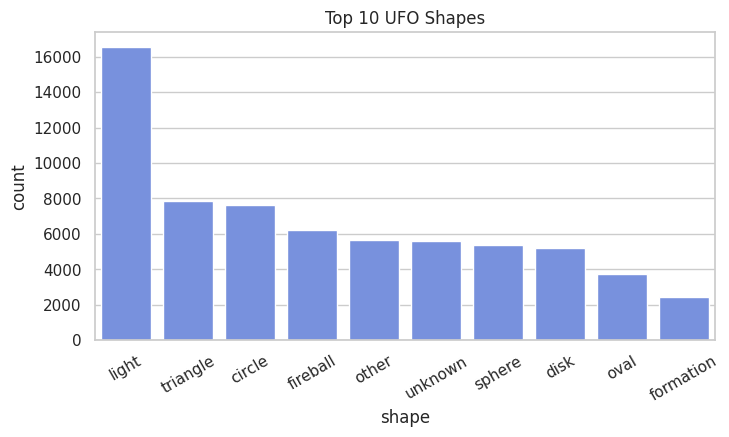

In [31]:
# Shape(목격 형태)별 빈도 Top 10
top_shape = df["shape"].value_counts().index[:10]
plt.figure(figsize=(8,4))
sns.countplot(data=df[df["shape"].isin(top_shape)], x="shape",
              order=top_shape)
plt.title("Top 10 UFO Shapes")
plt.xticks(rotation=30)
plt.show()

### duration별 data 확인

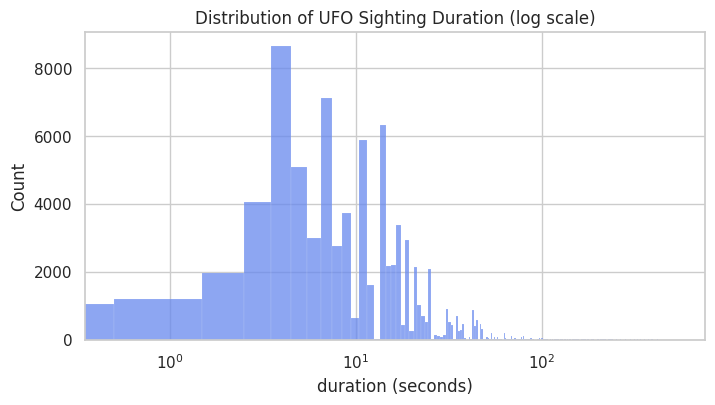

In [32]:
# 지속시간 (seconds) 분포
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="duration (seconds)", bins=50)
plt.xscale("log")  # 긴 tail 때문에 log scale 추천
plt.title("Distribution of UFO Sighting Duration (log scale)")
plt.show()

### 주 + top sahpe 연계

In [ ]:
try:
    df = pd.read_csv("/home/yj/dev_ws/project_UFO/data/scrubbed.csv", low_memory=False)
except FileNotFoundError:
    print("Error: 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    # 예시를 위해 임시 빈 데이터프레임 생성
    df = pd.DataFrame(columns=['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)', 'comments', 'latitude', 'longitude '])
    
# 날짜 컬럼 변환
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
# df['date_posted'] 컬럼은 현재 데이터셋에 없으므로 제외합니다.

# 필요한 컬럼 정리 및 이름 변경
df = df[['datetime','city','state','country','shape','duration (seconds)',
         'comments','latitude','longitude ']].copy()
df.rename(columns={'longitude ':'longitude'}, inplace=True)

# 데이터 클리닝 및 필터링
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# 미국(US) 데이터만 사용하고, 'state'가 결측치이거나 'shape'가 결측치인 행 제거
df_us = df[df['country'] == 'us'].dropna(subset=['state', 'shape']).copy()

# 요청: 가장 많은 형태인 'light'를 제외
df_filtered = df_us[df_us['shape'].str.lower() != 'light'].copy()

# 'state' 코드가 대문자이도록 통일 (Plotly의 locationmode와 일치시키기 위함)
df_filtered['state'] = df_filtered['state'].str.upper()

# 2. 데이터 집계 및 형태 분석

# 1) 주(state)별 전체 목격 건수 집계
df_counts = df_filtered.groupby('state').size().reset_index(name='total_sightings')

# 2) 주별 2순위 목격 형태 결정 (필터링 후 가장 빈번한 형태)
def get_most_common_shape_after_filter(group):
    """'Light'가 제외된 상태에서 가장 많이 목격된 형태를 반환"""
    counts = group['shape'].value_counts()
    if not counts.empty:
        # 필터링 후 1순위 형태 반환
        return counts.index[0] 
    else:
        return 'Unknown'

# 주별 2순위 형태 계산
df_shapes = df_filtered.groupby('state').apply(get_most_common_shape_after_filter).reset_index(name='secondary_shape')

# 3) 최종 데이터프레임 병합
df_plot = pd.merge(df_counts, df_shapes, on='state')

# 4) 형태별 기호(Symbol) 매핑
shape_to_symbol = {
    'circle': 'circle',
    'disk': 'circle',
    'sphere': 'circle',
    'oval': 'circle',
    'triangle': 'triangle-up',
    'delta': 'triangle-up',
    'chevron': 'triangle-up',
    'fireball': 'star',
    'cylinder': 'square',
    'rectangle': 'square',
    'cross': 'cross',
    'unknown': 'diamond',
    'other': 'diamond',
    'formation': 'diamond',
    'teardrop': 'diamond',
    'flash': 'circle',
    'cigar': 'square',
    'default': 'circle' # 기타 미정의된 형태
}

# 'shape' 컬럼을 소문자로 변환하여 매핑
df_plot['symbol'] = df_plot['secondary_shape'].str.lower().map(shape_to_symbol).fillna('circle')

# 3. Plotly Express를 이용한 시각화

# Plotly Express를 사용하여 기본 지오 버블 맵 생성
# 'state'를 location으로 사용하면 Plotly가 주의 중심 좌표를 자동으로 찾으려고 시도합니다.
fig = px.scatter_geo(
    df_plot,
    locations="state",                     # 주 코드를 위치로 사용
    locationmode='USA-states',             # 미국 주 모드로 설정
    color="secondary_shape",               # 2순위 형태에 따라 색상 구분
    size="total_sightings",                # 목격 건수에 따라 원의 크기 결정
    hover_name="state",                    # 마우스 오버 시 표시될 이름
    hover_data={
        'total_sightings': True,           # 목격 건수 표시
        'secondary_shape': True,           # 2순위 형태 표시
        'state': False                     # state 중복 표시 방지
    },
    scope="usa",                           # 지도 범위를 미국으로 제한
    title="미국 주별 UFO 목격 건수 및 2순위 형태 (Light 제외)",
    template="plotly_dark"                 # 모던하고 세련된 다크 템플릿 적용
)

# Plotly Express는 마커 심볼을 데이터 컬럼으로 직접 매핑하는 기능이 제한적이므로,
# go.Figure로 변환하여 심볼을 수동으로 업데이트하고 세부 스타일을 조정합니다.
fig_go = go.Figure(fig)

# 각 트레이스(shape별로 나뉜)의 마커 심볼을 업데이트하고 모던 스타일 적용
for i, trace in enumerate(fig_go.data):
    shape_name = trace.name
    # 해당 shape에 할당된 심볼을 찾아서 적용
    symbol_to_use = df_plot[df_plot['secondary_shape'] == shape_name]['symbol'].iloc[0] if not df_plot[df_plot['secondary_shape'] == shape_name].empty else 'circle'

    # 마커 설정 업데이트
    fig_go.data[i].marker.symbol = symbol_to_use
    fig_go.data[i].marker.sizemode = 'area'
    # 크기 기준점 조정 (시각적 효과 극대화)
    fig_go.data[i].marker.sizeref = 2. * df_plot['total_sightings'].max() / (70.**2) 
    fig_go.data[i].marker.opacity = 0.7 
    fig_go.data[i].marker.line.width = 1.5 # 테두리 두께
    fig_go.data[i].marker.line.color = 'rgb(255, 255, 255)' # 테두리 색상 흰색

# 지오 배경 설정 (모던한 다크 모드에 맞게)
fig_go.update_geos(
    landcolor='rgb(30, 30, 30)',         # 육지 색상 (짙은 회색)
    oceancolor='rgb(10, 10, 15)',        # 바다 색상 (매우 짙은 파란색)
    subunitcolor='rgb(100, 100, 100)',   # 주 경계선 (밝은 회색)
    showland=True,
    showocean=True,
    showsubunits=True,
    # 지도의 투영법을 변경하여 세련된 느낌을 줄 수 있습니다.
    projection_type="albers usa"
)

# 레이아웃 최종 업데이트
fig_go.update_layout(
    title_text='미국 주별 UFO 목격 건수 (Light 제외) 및 최빈 2순위 형태',
    title_font_color='white',
    title_x=0.5,
    margin={"r":0,"t":50,"l":0,"b":0},
    legend_title_text='2순위 형태 (마커 모양)',
    legend_bgcolor='rgba(30, 30, 30, 0.7)',
    legend_bordercolor='white',
    font=dict(color='white')
)

fig_go.show()

/tmp/ipykernel_7888/2558054802.py:48: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
import folium
from collections import Counter

BASE_PATH = "/home/yj/dev_ws/project_UFO/data"
ICON_MAPPING = {
    'circle': os.path.join(BASE_PATH, 'circle_ufo.png'),
    'disk': os.path.join(BASE_PATH, 'circle_ufo.png'),
    'sphere': os.path.join(BASE_PATH, 'circle_ufo.png'),
    'triangle': os.path.join(BASE_PATH, 'tri_ufo.png'),
    'delta': os.path.join(BASE_PATH, 'tri_ufo.png'),
    'chevron': os.path.join(BASE_PATH, 'tri_ufo.png'),
    'fireball': os.path.join(BASE_PATH, 'fireball_ufo.png'),
    'unknown': os.path.join(BASE_PATH, 'unknown.png'),
    'other': os.path.join(BASE_PATH, 'unknown.png'),
    'default': os.path.join(BASE_PATH, 'unknown.png') 
}
TOP_10_STATES = ['CA', 'WA', 'FL', 'TX', 'NY', 'AZ', 'IL', 'PA', 'OH', 'MI']
STATE_COORDS = {
    'CA': (36.7783, -119.4179), 'WA': (47.7511, -120.7401), 'FL': (27.6648, -81.5158),
    'TX': (31.9686, -99.9018), 'NY': (43.2994, -74.2179), 'AZ': (34.0489, -111.0937),
    'IL': (40.6331, -89.3985), 'PA': (41.2033, -77.1945), 'OH': (40.4173, -82.9071),
    'MI': (44.3148, -85.6024)
}

# 데이터 불러오기 및 필터링

try:
    df = pd.read_csv(os.path.join(BASE_PATH, "scrubbed.csv"), low_memory=False)
except FileNotFoundError:
    print("Error: 파일을 찾을 수 없습니다. 데이터 경로를 확인해주세요.")
  
    exit()

df.rename(columns={'longitude ':'longitude'}, inplace=True)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df_filtered = df[
    (df['country'] == 'us') & 
    (df['state'].notna()) & 
    (df['shape'].str.lower() != 'light')
].copy()
df_filtered['state'] = df_filtered['state'].str.upper()

# Top 10 주 데이터만 필터링
df_top10 = df_filtered[df_filtered['state'].isin(TOP_10_STATES)]

# 데이터 집계 및 Top 2 Shape 횟수 추출 (이전과 동일)

final_plot_data = []

for state in TOP_10_STATES:
    state_data = df_top10[df_top10['state'] == state]
    
    shape_counts = state_data['shape'].str.lower().value_counts()
    
    if shape_counts.empty:
        second_shape = 'unknown'
        second_count = 0
    else:
        second_shape = shape_counts.index[0]
        second_count = shape_counts.iloc[0]
        
    final_plot_data.append({
        'state': state,
        'lat': STATE_COORDS[state][0],
        'lon': STATE_COORDS[state][1],
        'second_shape': second_shape,
        'second_count': second_count
    })

df_plot = pd.DataFrame(final_plot_data)

# 지도 생성
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles="cartodbdarkmatter")

# **크기 스케일링 설정 변경**
max_count = df_plot['second_count'].max()
min_count = df_plot['second_count'].min()

# 아이콘 크기 범위를 넓혀서 차이를 극대화
MIN_ICON_PX = 30  # 최소 아이콘 크기
MAX_ICON_PX = 150 # 최대 아이콘 크기

def get_icon_size_enhanced(count):
    """목격 횟수에 비례하여 아이콘 크기를 반환 (차이 극대화)"""
    if max_count == min_count or count == 0:
        return MIN_ICON_PX
    
    # 정규화된 값 (0과 1 사이)
    normalized_count = (count - min_count) / (max_count - min_count)
    
    # 스케일링된 크기 계산
    scaled_size = MIN_ICON_PX + (MAX_ICON_PX - MIN_ICON_PX) * normalized_count
    
    # 최대 크기 초과 방지
    return int(max(MIN_ICON_PX, scaled_size))

# 데이터 포인트 반복 및 이미지 아이콘 추가
for index, row in df_plot.iterrows():
    shape = row['second_shape']
    count = row['second_count']
    icon_path = ICON_MAPPING.get(shape, ICON_MAPPING['default'])
    
    # **새로운 함수를 사용하여 횟수에 따른 아이콘 크기 계산**
    icon_size_px = get_icon_size_enhanced(count)
    
    # 이미지 아이콘 객체 생성
    icon = folium.CustomIcon(
        icon_image=icon_path,
        icon_size=(icon_size_px, icon_size_px),
        icon_anchor=(icon_size_px//2, icon_size_px//2)
    )
    
    # 팝업 및 툴팁 설정
    popup_html = f"""
    <b>주:</b> {row['state']}<br>
    <b>2순위 형태:</b> {shape.capitalize()}<br>
    <b>해당 횟수:</b> {count}건<br>
    """
    
    # 지도에 마커 추가
    folium.Marker(
        location=[row['lat'], row['lon']],
        tooltip=f"{row['state']}: {shape.capitalize()} ({count}건)",
        popup=folium.Popup(popup_html, max_width=300),
        icon=icon
    ).add_to(m)

# 지도를 HTML 파일로 저장
output_file = os.path.join('/home/yj/dev_ws/project_UFO/src', 'ufo_top10_secondary_shapes_map_enhanced_size.html')
m.save(output_file)

print(f"HTML 파일 경로: {output_file}")

# 자동 브라우저 열기
webbrowser.open(f"file://{output_file}")

HTML 파일 경로: /home/yj/dev_ws/project_UFO/src/ufo_top10_secondary_shapes_map_enhanced_size.html


In [41]:
# =============================
# 0. 경로 및 아이콘 설정
# =============================
BASE_PATH = "/home/yj/dev_ws/project_UFO/data"
ICON_MAPPING = {
    'circle': os.path.join(BASE_PATH, 'circle_ufo.png'),
    'disk': os.path.join(BASE_PATH, 'circle_ufo.png'),
    'sphere': os.path.join(BASE_PATH, 'circle_ufo.png'),
    'triangle': os.path.join(BASE_PATH, 'tri_ufo.png'),
    'delta': os.path.join(BASE_PATH, 'tri_ufo.png'),
    'chevron': os.path.join(BASE_PATH, 'tri_ufo.png'),
    'fireball': os.path.join(BASE_PATH, 'fireball_ufo.png'),
    'unknown': os.path.join(BASE_PATH, 'unknown.png'),
    'other': os.path.join(BASE_PATH, 'unknown.png'),
    'default': os.path.join(BASE_PATH, 'unknown.png') 
}

# 미국 50개 주 중심 좌표 (위도, 경도)
STATE_COORDS = {
    'AL': (32.806671, -86.791130), 'AK': (61.370716, -152.404419), 'AZ': (33.729759, -111.431221),
    'AR': (34.969704, -92.373123), 'CA': (36.116203, -119.681564), 'CO': (39.059811, -105.311104),
    'CT': (41.597782, -72.755371), 'DE': (39.318523, -75.507141), 'FL': (27.766279, -81.686783),
    'GA': (33.040619, -83.643074), 'HI': (21.094318, -157.498337), 'ID': (44.240459, -114.478828),
    'IL': (40.349457, -88.986137), 'IN': (39.849426, -86.258278), 'IA': (42.011539, -93.210526),
    'KS': (38.526600, -96.726486), 'KY': (37.668140, -84.670067), 'LA': (31.169546, -91.867805),
    'ME': (44.693947, -69.381927), 'MD': (39.063946, -76.802101), 'MA': (42.230171, -71.530106),
    'MI': (43.326618, -84.536095), 'MN': (45.694454, -93.900192), 'MS': (32.741646, -89.678696),
    'MO': (38.456085, -92.288368), 'MT': (46.921925, -110.454353), 'NE': (41.125370, -98.268082),
    'NV': (38.313515, -117.055374), 'NH': (43.452492, -71.563896), 'NJ': (40.298904, -74.521011),
    'NM': (34.840515, -106.248482), 'NY': (42.165726, -74.948051), 'NC': (35.630066, -79.806419),
    'ND': (47.528912, -99.784012), 'OH': (40.388783, -82.764915), 'OK': (35.565342, -96.928917),
    'OR': (44.572021, -122.070938), 'PA': (40.590752, -77.209755), 'RI': (41.680893, -71.511780),
    'SC': (33.856892, -80.945007), 'SD': (44.299782, -99.438828), 'TN': (35.747845, -86.692345),
    'TX': (31.054487, -97.563461), 'UT': (40.150032, -111.862434), 'VT': (44.045876, -72.710686),
    'VA': (37.769337, -78.169968), 'WA': (47.400902, -121.490494), 'WV': (38.491226, -80.954456),
    'WI': (44.268543, -89.616508), 'WY': (42.755966, -107.302490)
}

# =============================
# 1. 데이터 불러오기 및 필터링
# =============================
try:
    df = pd.read_csv(os.path.join(BASE_PATH, "scrubbed.csv"), low_memory=False)
except FileNotFoundError:
    print("Error: 파일을 찾을 수 없습니다. 경로 확인 필요.")
    exit()

df.rename(columns={'longitude ':'longitude'}, inplace=True)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# US 데이터 + state 결측 제거 + Light 제외
df_filtered = df[
    (df['country']=='us') & 
    (df['state'].notna()) & 
    (df['shape'].str.lower()!='light')
].copy()
df_filtered['state'] = df_filtered['state'].str.upper()

# =============================
# 2. 주별 Top1 Shape 집계
# =============================
final_plot_data = []

for state, group in df_filtered.groupby('state'):
    shape_counts = group['shape'].str.lower().value_counts()
    if not shape_counts.empty:
        top1_shape = shape_counts.index[0]        # Top1
        top1_count = shape_counts.iloc[0]
    else:
        top1_shape = 'unknown'
        top1_count = 0
    
    lat, lon = STATE_COORDS.get(state, (0,0))
    
    final_plot_data.append({
        'state': state,
        'lat': lat,
        'lon': lon,
        'top1_shape': top1_shape,
        'top1_count': top1_count
    })

df_plot = pd.DataFrame(final_plot_data)

# =============================
# 3. Folium 지도 생성
# =============================
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles="cartodbdarkmatter")

max_count = df_plot['top1_count'].max()
min_count = df_plot['top1_count'].min()

MIN_ICON_PX = 30
MAX_ICON_PX = 150

def get_icon_size(count):
    if max_count == min_count or count == 0:
        return MIN_ICON_PX
    norm = (count - min_count)/(max_count - min_count)
    return int(MIN_ICON_PX + (MAX_ICON_PX - MIN_ICON_PX)*norm)

# =============================
# 4. Marker 추가
# =============================
for idx, row in df_plot.iterrows():
    icon_path = ICON_MAPPING.get(row['top1_shape'], ICON_MAPPING['default'])
    icon_size = get_icon_size(row['top1_count'])
    
    icon = folium.CustomIcon(
        icon_image=icon_path,
        icon_size=(icon_size, icon_size),
        icon_anchor=(icon_size//2, icon_size//2)
    )
    
    popup_html = f"""
    <b>State:</b> {row['state']}<br>
    <b>Top1 Shape:</b> {row['top1_shape'].capitalize()}<br>
    <b>Count:</b> {row['top1_count']}
    """
    
    folium.Marker(
        location=[row['lat'], row['lon']],
        tooltip=f"{row['state']}: {row['top1_shape'].capitalize()} ({row['top1_count']})",
        popup=folium.Popup(popup_html, max_width=300),
        icon=icon
    ).add_to(m)

# =============================
# 5. HTML 저장 및 자동 브라우저 열기
# =============================
output_file = '/home/yj/dev_ws/project_UFO/src/ufo_all_states_top1_map.html'
m.save(output_file)
print(f"HTML 파일 저장 완료: {output_file}")

# 자동 브라우저 열기
webbrowser.open(f"file://{output_file}")

HTML 파일 저장 완료: /home/yj/dev_ws/project_UFO/src/ufo_all_states_top1_map.html


True